# Obligatorisk innlevering 2 - oppgave 1

Denne oppgaven tar for seg et datasett fra Food Mart, som er ennærbutikkjede i USA. Food Mart har i dette datasettet samlet endel data i forbindelse med mediekampanjer. Din oppgave er å forutsi kostnadene for mediekampanjer i matvaremarkedet på grunnlag av funksjonene som tilbys.

In [1]:
# Importer resten av pakkene du trenger her:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett1.csv")
# Her deler jeg datasettet inn i egenskaper (X) og target (y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
# PS: Ikke endre denne kodecellen!

#### Oppgave 1.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? 

Begrunn svaret

34602     69.63
2298     136.74
47831    126.62
2812      54.11
36308    129.20
          ...  
21243     81.79
45891     67.63
42613     93.11
43567    149.08
2732      97.34
Name: cost, Length: 38522, dtype: float64


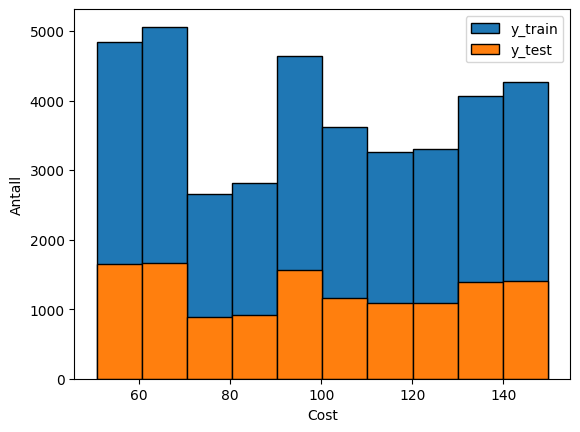

In [15]:
#TODO: visualiser y_train og y_test i et histogram

# Printer ut informasjon om kolonnen.
print(y_train)

# Visualisering av y_train og y_test i et histogram.
plt.hist(y_train, edgecolor="black", label="y_train")
plt.hist(y_test, edgecolor="black", label="y_test")
plt.xlabel("Cost")
plt.ylabel("Antall")
plt.legend(loc="upper right")

**Svar:**

Kolonnen heter "cost" som er av typen float, dette er et klassisk regresjons problem hvor vi skal predikere en verdi. I klassifisering så er det en kolonne som blir klassen, den er som regel ja eller nei. Den kan også være kategorisk og da tenker jeg at vi kan kanskje bruke klassifisering for å predikere om en observasjon blir en kostnad som er i for eksempel kategorien 60, 80, 100, 120 eller 140. Siden kostnad er en kontinuerlig verdi, tenker jeg at regresjon einer seg bedre til dette problemet.

#### Oppgave 1.2) 

fullfør funksjonen under slik at den tar inn både egenskapene og target, legger disse sammen i samme matrise igjen og visualiser dataene som en korrelasjonsmatrise (poenget er at du skal kunne se hvordan egenskapene korrelerer med target).

* Beskriv hvilke egenskaper du ser korrelerer mest med target

In [4]:
def korrelasjonsmatrise(X,y):
    X_temp = X.copy()
    y_temp = y.copy()
    X_temp["Target"] = y_temp
    #TODO: Fullfør koden

    # Print ut datatypene
    # print(X_temp.dtypes, "\n")
    
    # Lager en korrelasjonsmatrise
    correlation_matrix = round(X_temp.corr(), 2)

    # Lager selve plottet av korrelasjonsmatrisen.
    fig, ax = plt.subplots(figsize=(12, 10)) 
    cax = ax.matshow(correlation_matrix, cmap='Greens') 
    # Legg til farge bar.
    fig.colorbar(cax) 

    # Sett opp ticks og labels.
    ax.set_xticks(np.arange(len(correlation_matrix.columns))) 
    ax.set_yticks(np.arange(len(correlation_matrix.columns))) 
    ax.set_xticklabels(correlation_matrix.columns, rotation=90) 
    ax.set_yticklabels(correlation_matrix.columns)
    ax.xaxis.set_ticks_position("bottom")
    ax.set_title("Korrelasjonsmatrise", fontsize=15, pad=10)

    # Annonterer hver celle med en korrelasjons koffesient.
    for (i, j), val in np.ndenumerate(correlation_matrix.values): 
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')
    

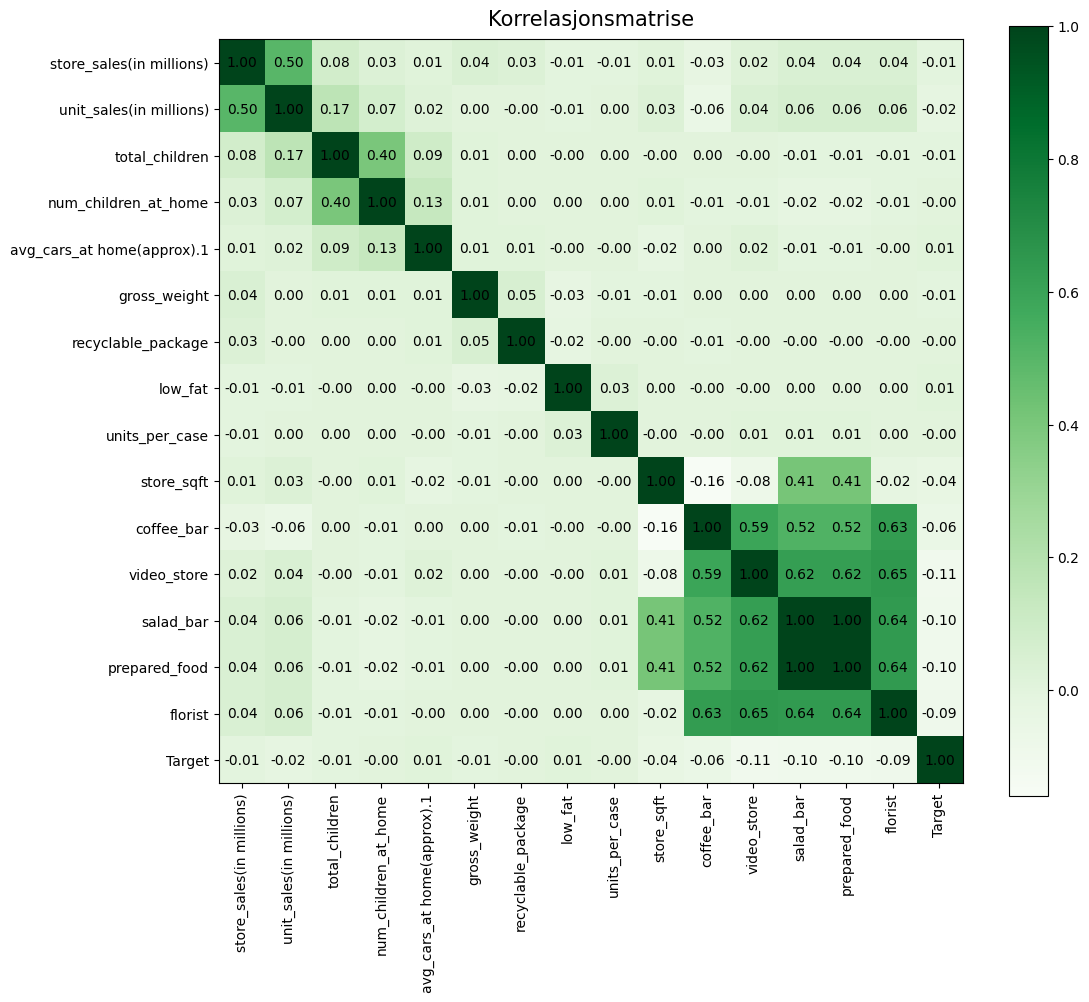

In [5]:
korrelasjonsmatrise(X_train,y_train)

**Svar:**

Mellom target og alle variablene er det veldig svak negativ og positiv korrelasjon. Variabelene som korrelerer mest negativt er prepared_food, salad_bar, video_store, coffe_bar og florist. De variablene som korrelerer mest positivt er low_fat og avg_cars_at_home(approx).1

#### Oppgave 1.3) 
Velg en modellarkitektur (gjerne fra Scikit-Learn) og gjør et strukturert hyperparametersøk. 
* Gjør et søk på minst 3 paramtere og minst 2 verdier pr parameter
* Bruk 3-folds kryssvalidering for hver parameterkombinasjon
* Velg en metrikk som passer for målet (tips: "neg_mean_squared_error" i sklearn) 
* Skriv ut den parameterkobinasjonen som ga den beste skåren, samt skåren. Kommenter resultatet

In [6]:
#TODO: Utfør hyperparametersøk for en modell
linreg_pipeline = Pipeline([("scaler", StandardScaler()), ("regressor", LinearRegression())])
linreg_pipeline.fit(X_train, y_train)

# Sett parametere og verdier som skal søkes.
param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__copy_X': [True, False],
    'regressor__positive': [True, False],
}

# Kjør grid search på modellen med parameterne, med 3 kryssvalideringer og NMSE skåring.
grid_search = GridSearchCV(linreg_pipeline, param_grid, cv=3, scoring="neg_mean_squared_error")
# Så blir modellen fit-et til søket.
grid_search.fit(X_train, y_train)

print(f"Beste parameter kombinasjon: {grid_search.best_params_}")
print(f"Beste skår fra Grid Search: {grid_search.best_score_}")

Beste parameter kombinasjon: {'regressor__copy_X': True, 'regressor__fit_intercept': True, 'regressor__positive': False}
Beste skår fra Grid Search: -886.7751886711675


**Svar:**

De beste parameterne den fant etter et søk er copy X: True, fit_intercept: True og positive: False. Copy X er satt til sann som betyr at den lager en kopi av datasettet slik at den ikke skriver over det orginale datasettet. Fit intercept er satt til sann som betyr at den setter en konstant som kalkulerer et kryss punkt som best passer dataen. Det siste parameteret positive er satt til usann, positive styrer om koffesientene skal være positive. Dette gir mening fordi i korrelasjonsmatrisen så ser vi at forholdet mellom target og variablene peker mer negativt enn positivt. Ulempen med at jeg har valgt Linær regresjon er at det er få parametere som kanskje ikke har så mye å si, fordelen igjen er jo at jeg gjør en multippel regresjon på alle uavhengie variabler.

Skåren vi får er -886 negativ MSE som ikke er en veldig bra skår, denne skal helst være så nærme null som mulig. Dette kan tyde på at modellen ikke klarer å predikere target bra nokk.

#### Oppgave 1.4) 
Bruk hyperparameterkombinasjonen fra oppgave 1.3 og kryssvalider den modellen på nytt med K >= 5 
* Logg "mean absolute error" og "mean squared error" for hver kryssvalideringsrunde
* Oppgi gjennomsnitt og standardavvik for "mean absolute error" og "mean squared error" etter kryssvalideringen og kommenter resultatet
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i treningsdataene? 

In [7]:
#TODO: Utfør kryssvalidering med de optimale parameterene fra forrige oppgave og logg mean_absolute_error og mean_squared_error

# Lister som skal holde skårer fra MSE og MAE.
mse_scores = list()
mae_scores = list()

# Sett opp K fold og en løkke som går igjennom 5 fold.
kf = KFold(5)
for i, (train, test) in enumerate(kf.split(X_train)):
    print(f"Fold: {i + 1}")
    # Lager modellen med de beste parameterne.
    linreg_pipeline = Pipeline([
        ("scaler", StandardScaler()), 
        ("regressor", LinearRegression(fit_intercept=True, copy_X=True, positive=False))
    ])
    # Fit modellen med det nåværende fold-et.
    linreg_pipeline.fit(X_train.iloc[train], y_train.iloc[train])
    # Prediker target for fold-ets testdata.
    y_hat = linreg_pipeline.predict(X_train.iloc[test])
    # Beregn MSE og MAE på de predikerte verdiene.
    mse = mean_squared_error(y_train.iloc[test], y_hat)
    mae = mean_absolute_error(y_train.iloc[test], y_hat)
    # Legg skårene til listene.
    mse_scores.append(mse)
    mae_scores.append(mae)
    # Print ut skårene for foldet.
    print(f"MSE: {mse}")
    print(f"MAE: {mae}", "\n")

Fold: 1
MSE: 886.4862901999794
MAE: 25.777571805854947 

Fold: 2
MSE: 892.600278547062
MAE: 25.814749952443538 

Fold: 3
MSE: 897.2834213207955
MAE: 25.88761267316264 

Fold: 4
MSE: 880.5462387931301
MAE: 25.606007756488196 

Fold: 5
MSE: 874.8605894716384
MAE: 25.346665982086215 



In [8]:
#TODO: Beregn gjennomsnitt og standard avvik for mean_absolute_error og mean_squared_error og beregn hvor stor den 
# gjennomsnittlige feilen er i forhold til den gjennomsnittlige prisen for markedskampanjen (target) i prosent

# Bergen gjennomsnitlig MSE og MAE. 
avg_mse = np.mean(mse_scores)
avg_mae = np.mean(mae_scores)

# Beregn standard avvik for MSE og MAE.
std_mse = np.std(mse_scores)
std_mae = np.std(mae_scores)

# Beregn gjennomsnitlig pris og den gjennomsnitlige feilen i forhold til faktisk pris i prosent.
mean_cost = np.mean(y_train)
avg_error_percentage = (avg_mae / mean_cost) * 100

print(f"Gjennomsnitlig MSE: {avg_mse}")
print(f"Gjennomsnitlig MAE: {avg_mae}", "\n")

print(f"Standard avvik MSE: {std_mse}")
print(f"Standard avvik MAE: {std_mae}", "\n")

print(f"Gjennomsnitlig feil i forhold til den faktiske prisen: {avg_error_percentage:.2f}%")

Gjennomsnitlig MSE: 886.355363666521
Gjennomsnitlig MAE: 25.686521634007107 

Standard avvik MSE: 8.053748360900043
Standard avvik MAE: 0.19347071617529749 

Gjennomsnitlig feil i forhold til den faktiske prisen: 25.86%


**Svar:**

Ut i fra k fold kryssvalideringen kan vi se at MSE og MAE for hver fold er ganskle like med veldig lav variasjon. Vi ser også at gjennomsnitlig MSE er nesten helt lik beste skåren fra grid search men positivt. Gjennomsnitlig feil i forhold til den faktiske prisen er på 26% rundet opp.

#### Oppgave 1.5) 
Tren modellen en siste gang på alle treningsdataene og gjør prediksjon på testdataene (bruk de optimale parametrene fra oppgave 1.3)
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i testdataene? 

In [9]:
#TODO: Tren modellen på alle treningsdata og utfør prediksjon på testdataene

# Lager modellen med de beste parameterne.
linreg_pipeline = Pipeline([
    ("scaler", StandardScaler()), 
    ("regressor", LinearRegression(fit_intercept=True, copy_X=True, positive=False))
])

# Fit test dataen.
linreg_pipeline.fit(X_test, y_test)
# Prediker test dataene
y_hat = linreg_pipeline.predict(X_test)

# Beregn gjennomsnitlig pris og den gjennomsnitlige feilen i forhold til faktisk pris i prosent.
mean_cost = np.mean(y_test)
avg_error_percentage = (mean_absolute_error(y_test, y_hat) / mean_cost) * 100

# Bereng MSE og MAE og print de ut.
print(f"MSE: {mean_squared_error(y_test, y_hat)}")
print(f"MAE: {mean_absolute_error(y_test, y_hat)}", "\n")

print(f"Gjennomsnitlig feil i forhold til den faktiske prisen: {avg_error_percentage:.2f}%")

MSE: 892.328915218899
MAE: 25.792629375517752 

Gjennomsnitlig feil i forhold til den faktiske prisen: 25.97%


**Svar:**

Ut i fra test dataen kan vi se at den samsvarer ganske så likt med k fold kryssvalideringen, den er noe dårligere men ikke så mye dårligere. Det samme ser vi på gjennomsnitlig feil i forhold til faktisk verdi.